In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0.5, 0, 'Age(in YRS)')

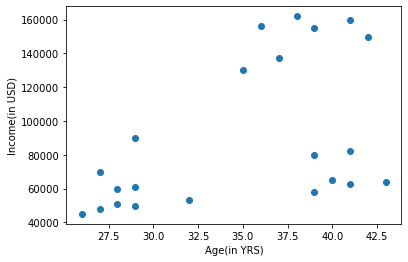

In [7]:
plt.scatter(df.Age, df['Income($)'])
plt.ylabel('Income(in USD)')
plt.xlabel('Age(in YRS)')

In [10]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [13]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


### cluster_centers_ are centroids of cluters

In [15]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

### inertia_ is SSE(Sum of squared errors)

In [16]:
km.inertia_

1577046058.883117

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

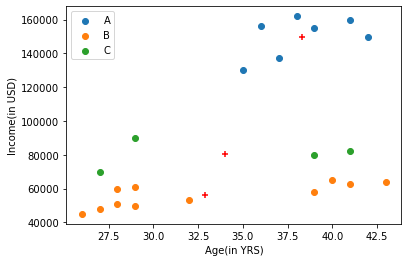

In [29]:
plt.scatter(df1.Age, df1['Income($)'])
plt.scatter(df2.Age, df2['Income($)'])
plt.scatter(df3.Age, df3['Income($)'])
# plotting sse of clusters
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="+", color='red')
plt.ylabel('Income(in USD)')
plt.xlabel('Age(in YRS)')
plt.legend(['A','B','C'])

In [34]:
# Scaling Age and income between 0-1
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [35]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


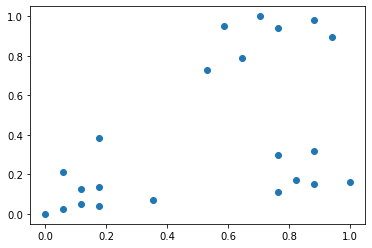

In [36]:
plt.scatter(df['Age'], df['Income($)'])

In [37]:
km_s = KMeans(n_clusters = 3)
new_y_predicted = km_s.fit_predict(df[['Age', 'Income($)']])
new_y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [39]:
df['cluster'] = new_y_predicted

In [49]:
new_df1 = df[df.cluster == 0]
new_df2 = df[df.cluster == 1]
new_df3 = df[df.cluster == 2]

### New K Means Cluster centroids

In [50]:
km_s.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

### Inertia (SSE)

In [51]:
km_s.inertia_

0.4750783498553097

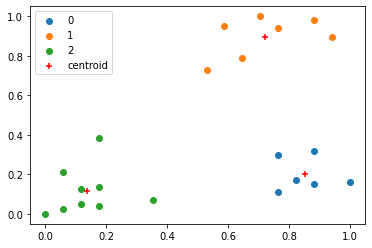

In [55]:
plt.scatter(new_df1['Age'], new_df1['Income($)'])
plt.scatter(new_df2['Age'], new_df2['Income($)'])
plt.scatter(new_df3['Age'], new_df3['Income($)'])
plt.scatter(km_s.cluster_centers_[:, 0], km_s.cluster_centers_[:, 1], marker="+", color='RED')
plt.legend([0, 1, 2, 'centroid'])
# Here we can see that poinst of cluster are scattered correctly

### Finding perfect n_clusters for model using elbow technique

In [60]:
sse = []
n_clusters = range(1, 10)
for k in n_clusters:
    km_test = KMeans(n_clusters = k)
    km_test.fit_predict(df[['Age', 'Income($)']])
    sse.append(km_test.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22020960864009395,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426]

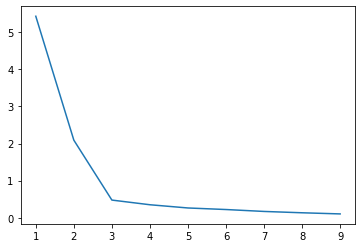

In [65]:
plt.plot(n_clusters, sse)
# Here we can see that elbow joint is pointing towards 3 on x-axis